In [15]:
import numpy as np # 数値計算ライブラリ
import matplotlib.pyplot as plt # グラフ描画ライブラリ
import scienceplots # グラフ描画テーマ

np.random.seed(0) # 乱数のシードを固定

In [16]:
def kalman_filter(A: np.ndarray, B: np.ndarray, C: np.ndarray, Q: np.ndarray, R: np.ndarray, y: np.ndarray, x_hat: np.ndarray, P: np.ndarray) -> tuple:
    """
    カルマンフィルタ（制御入力を考えない）

    Args:
        A (np.ndarray): システム行列 (n, n)
        B (np.ndarray): システム行列 (n, r)
        C (np.ndarray): システム行列 (p, n)
        Q (np.ndarray): システム雑音の共分散行列 (r, r)
        R (np.ndarray): 観測雑音の共分散行列 (p, p)
        y (np.ndarray): 観測値 (p, )
        x_hat (np.ndarray): 事前状態推定値 (n, )
        P (np.ndarray): 事前誤差共分散行列 (n, n)

    Returns:
        x_hat_new (np.ndarray): 事後状態推定値 (n, )
        P_new (np.ndarray): 事後誤差共分散行列 (n, n)
        G (np.ndarray): カルマンゲイン (n, p)
    """

    x_hat_neg = A @ x_hat # 事前状態推定値,(n, n)@(n, )=(n, )
    P_neg = A @ P @ A.T + Q + B @ Q @ B.T # 事前誤差共分散行列,(n, n)@(n, n)@(n, n)+(n, r)@(r, r)@(r, n)=(n, n)
    G = P_neg @ C.T @ np.linalg.inv(C @ P_neg @ C.T + R) # カルマンゲイン,(n, n)@(n, p)@(p, p)@(p, n)=(n, p)
    x_hat_new = x_hat_neg + G @ (y - C @ x_hat_neg) # 事後状態推定値,(n, )+(n, p)@(p, )=(n, )
    P_new = (np.eye(A.shape[0]) - G @ C) @ P_neg # 事後誤差共分散行列,(n, n)@(n, p)@(p, n)=(n, n)

    return (x_hat_new, P_new, G)

In [5]:
### 問題設定 ###
A = np.array([[0, -0.7], [1, -1.5]]) # システム行列 (2, 2)
B = np.array([0.5, 1]).reshape(-1, 1) # システム行列 (2, 1)
C = np.array([0, 1]).reshape(1, -1) # システム行列 (1, 2)
Q = np.array([1]).reshape(-1, 1) # システム雑音の共分散行列 (1, 1)
R = np.array([0.1]).reshape(-1, 1) # 観測雑音の共分散行列 (1, 1)
N = 100 # データ数


### 観測データの生成 ###
v = np.random.multivariate_normal([0], Q, N) # システム雑音 (N, 1)
w = np.random.multivariate_normal([0], R, N) # 観測雑音 (N, 1)

x = np.zeros((N, 2)) # 状態の真値を格納する配列
y = np.zeros((N, 1)) # 観測値を格納する配列

x[0] = np.array([0, 0]) # 初期状態 (2, )
y[0] = C @ x[0].T + w[0] # 初期観測値 (1, )

# 状態空間モデルに従って状態の真値と観測を生成
for i in range(1, N):
    x[i] = A @ x[i-1].T + B @ v[i] # 状態遷移
    y[i] = C @ x[i].T + w[i] # 観測


### カルマンフィルタによる推定 ###
x_hat = np.zeros((N, 2)) # 事後状態推定値を格納する配列
gamma = 1 # 初期誤差共分散行列のゲイン
P = gamma * np.eye(2) # 初期誤差共分散行列 (2, 2)

params_Q = np.array([0.1, 1, 10]).reshape(-1, 1, 1) # 実験で用いるシステム雑音の共分散行列のパラメータ
params_R = np.array([0.01, 0.1, 1]).reshape(-1, 1, 1) # 実験で用いる観測雑音の共分散行列のパラメータ
states = ["lower", "equal", "upper"]

plt.style.use(['science', 'grid', 'no-latex']) # グラフ描画テーマの設定
fig, axes = plt.subplots(9, 2, figsize=(16, 4*9)) # グラフ描画領域の設定

# カルマンフィルタによる推定
for i in range(1, N):
    x_hat[i], P, _ = kalman_filter(A, B, C, Q, R, y[i], x_hat[i-1].T, P) # i時点の事後状態推定値をカルマンフィルタで推定

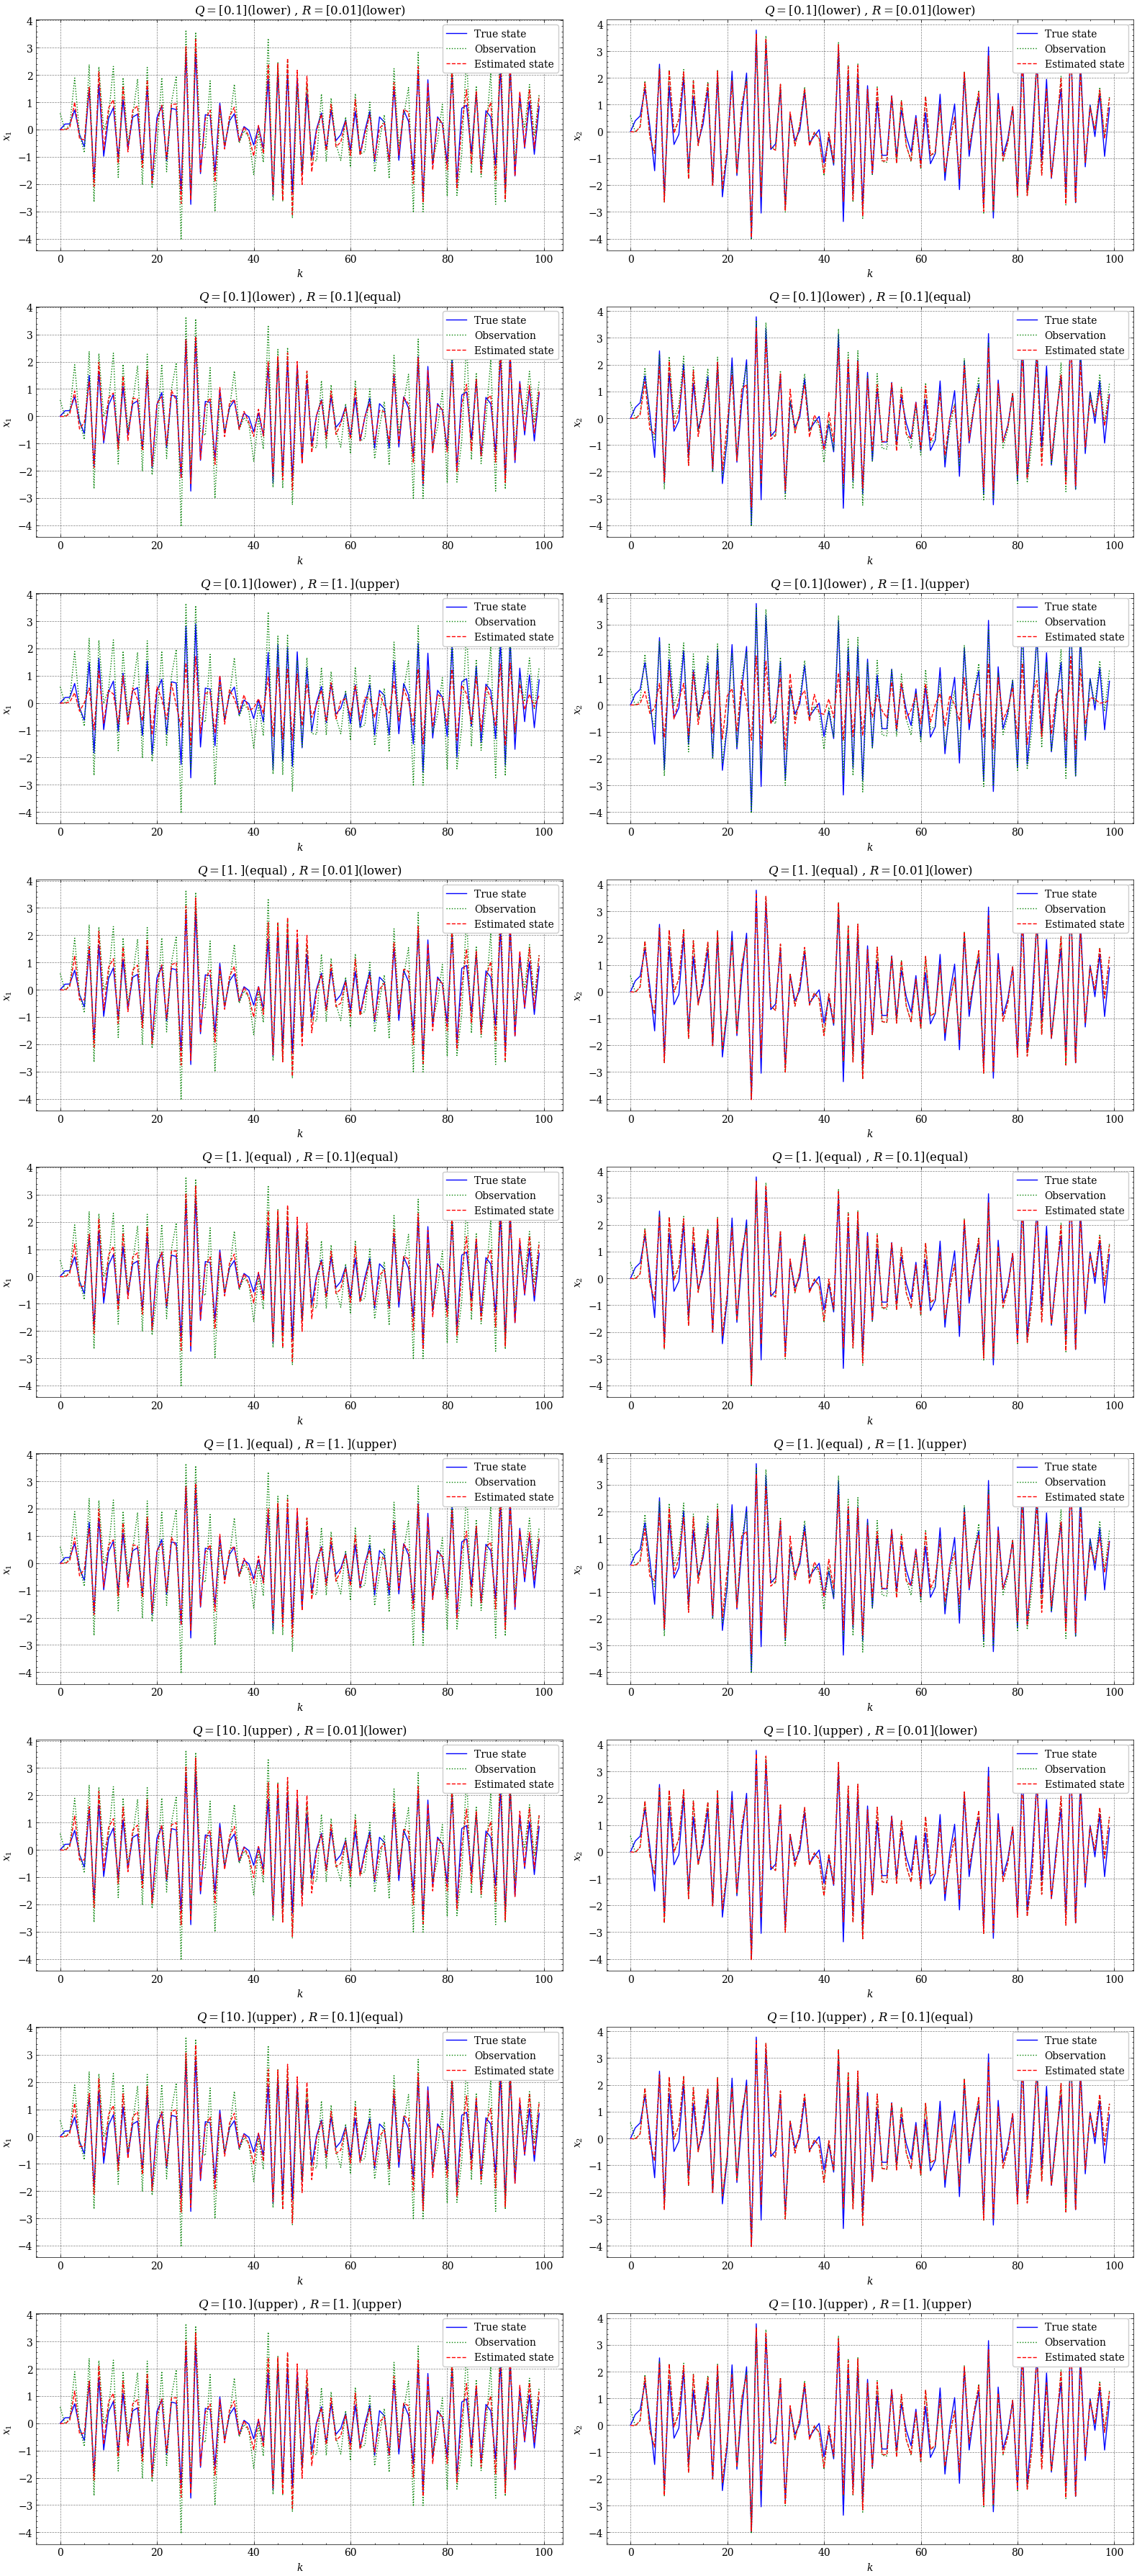

In [17]:
### 問題設定 ###
A = np.array([[0, -0.7], [1, -1.5]]) # システム行列 (2, 2)
B = np.array([0.5, 1]).reshape(-1, 1) # システム行列 (2, 1)
C = np.array([0, 1]).reshape(1, -1) # システム行列 (1, 2)
Q = np.array([1]).reshape(-1, 1) # システム雑音の共分散行列 (1, 1)
R = np.array([0.1]).reshape(-1, 1) # 観測雑音の共分散行列 (1, 1)
N = 100 # データ数


### 観測データの生成 ###
v = np.random.multivariate_normal([0], Q, N) # システム雑音 (N, 1)
w = np.random.multivariate_normal([0], R, N) # 観測雑音 (N, 1)

x = np.zeros((N, 2)) # 状態の真値を格納する配列
y = np.zeros((N, 1)) # 観測値を格納する配列

x[0] = np.array([0, 0]) # 初期状態 (2, )
y[0] = C @ x[0].T + w[0] # 初期観測値 (1, )

# 状態空間モデルに従って状態の真値と観測を生成
for i in range(1, N):
    x[i] = A @ x[i-1].T + B @ v[i] # 状態遷移
    y[i] = C @ x[i].T + w[i] # 観測


### カルマンフィルタによる推定とシミュレーション ###
x_hat = np.zeros((N, 2)) # 事後状態推定値を格納する配列
gamma = 1 # 初期誤差共分散行列のゲイン
P = gamma * np.eye(2) # 初期誤差共分散行列 (2, 2)

params_Q = np.array([0.1, 1, 10]).reshape(-1, 1, 1) # シミュレーシで用いるシステム雑音の共分散行列のパラメータ
params_R = np.array([0.01, 0.1, 1]).reshape(-1, 1, 1) # シミュレーシで用いる観測雑音の共分散行列のパラメータ
states = ["lower", "equal", "upper"]

plt.style.use(['science', 'grid', 'no-latex']) # グラフ描画テーマの設定
fig, axes = plt.subplots(9, 2, figsize=(16, 4*9)) # グラフ描画領域の設定

# 試行数が少ないのでfor文を多重にして用いる
for i in range(3):
    for j in range(3):
        for k in range(1, N):
            # k時点の事後状態推定値をカルマンフィルタで推定
            x_hat[k], P, _ = kalman_filter(A, B, C, params_Q[i], params_R[j], y[k], x_hat[k-1].T, P)

        # 可視化
        for l in range(2):
            axes[3*i+j, l].plot(x[:, l], label='True state', linestyle='solid', color='blue')
            axes[3*i+j, l].plot(y[:, 0], label='Observation', linestyle='dotted', color='green')
            axes[3*i+j, l].plot(x_hat[:, l], label='Estimated state', linestyle='dashed', color='red')
            axes[3*i+j, l].set_xlabel('$k$')
            axes[3*i+j, l].set_ylabel(f'$x_{l+1}$')
            axes[3*i+j, l].legend(loc='upper right')
            axes[3*i+j, l].set_title(f'$Q = {params_Q[i][0]}$({states[i]}) , $R = {params_R[j][0]}$({states[j]})')
        
plt.tight_layout()
plt.savefig('kalman_filter.png', dpi=300)
plt.show()


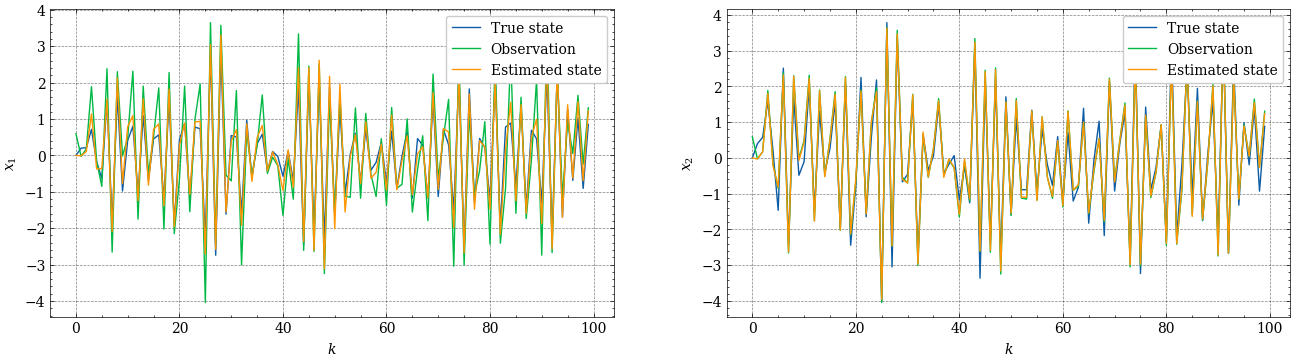

In [6]:
# 可視化
plt.style.use(['science', 'grid', 'no-latex'])
plt.figure(figsize=(16, 4))



for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.plot(x[:, i], label='True state')
    plt.plot(y[:, 0], label='Observation')
    plt.plot(x_hat[:, i], label='Estimated state')
    plt.xlabel('$k$')
    plt.ylabel(f'$x_{i+1}$')
    plt.legend(loc='upper right')

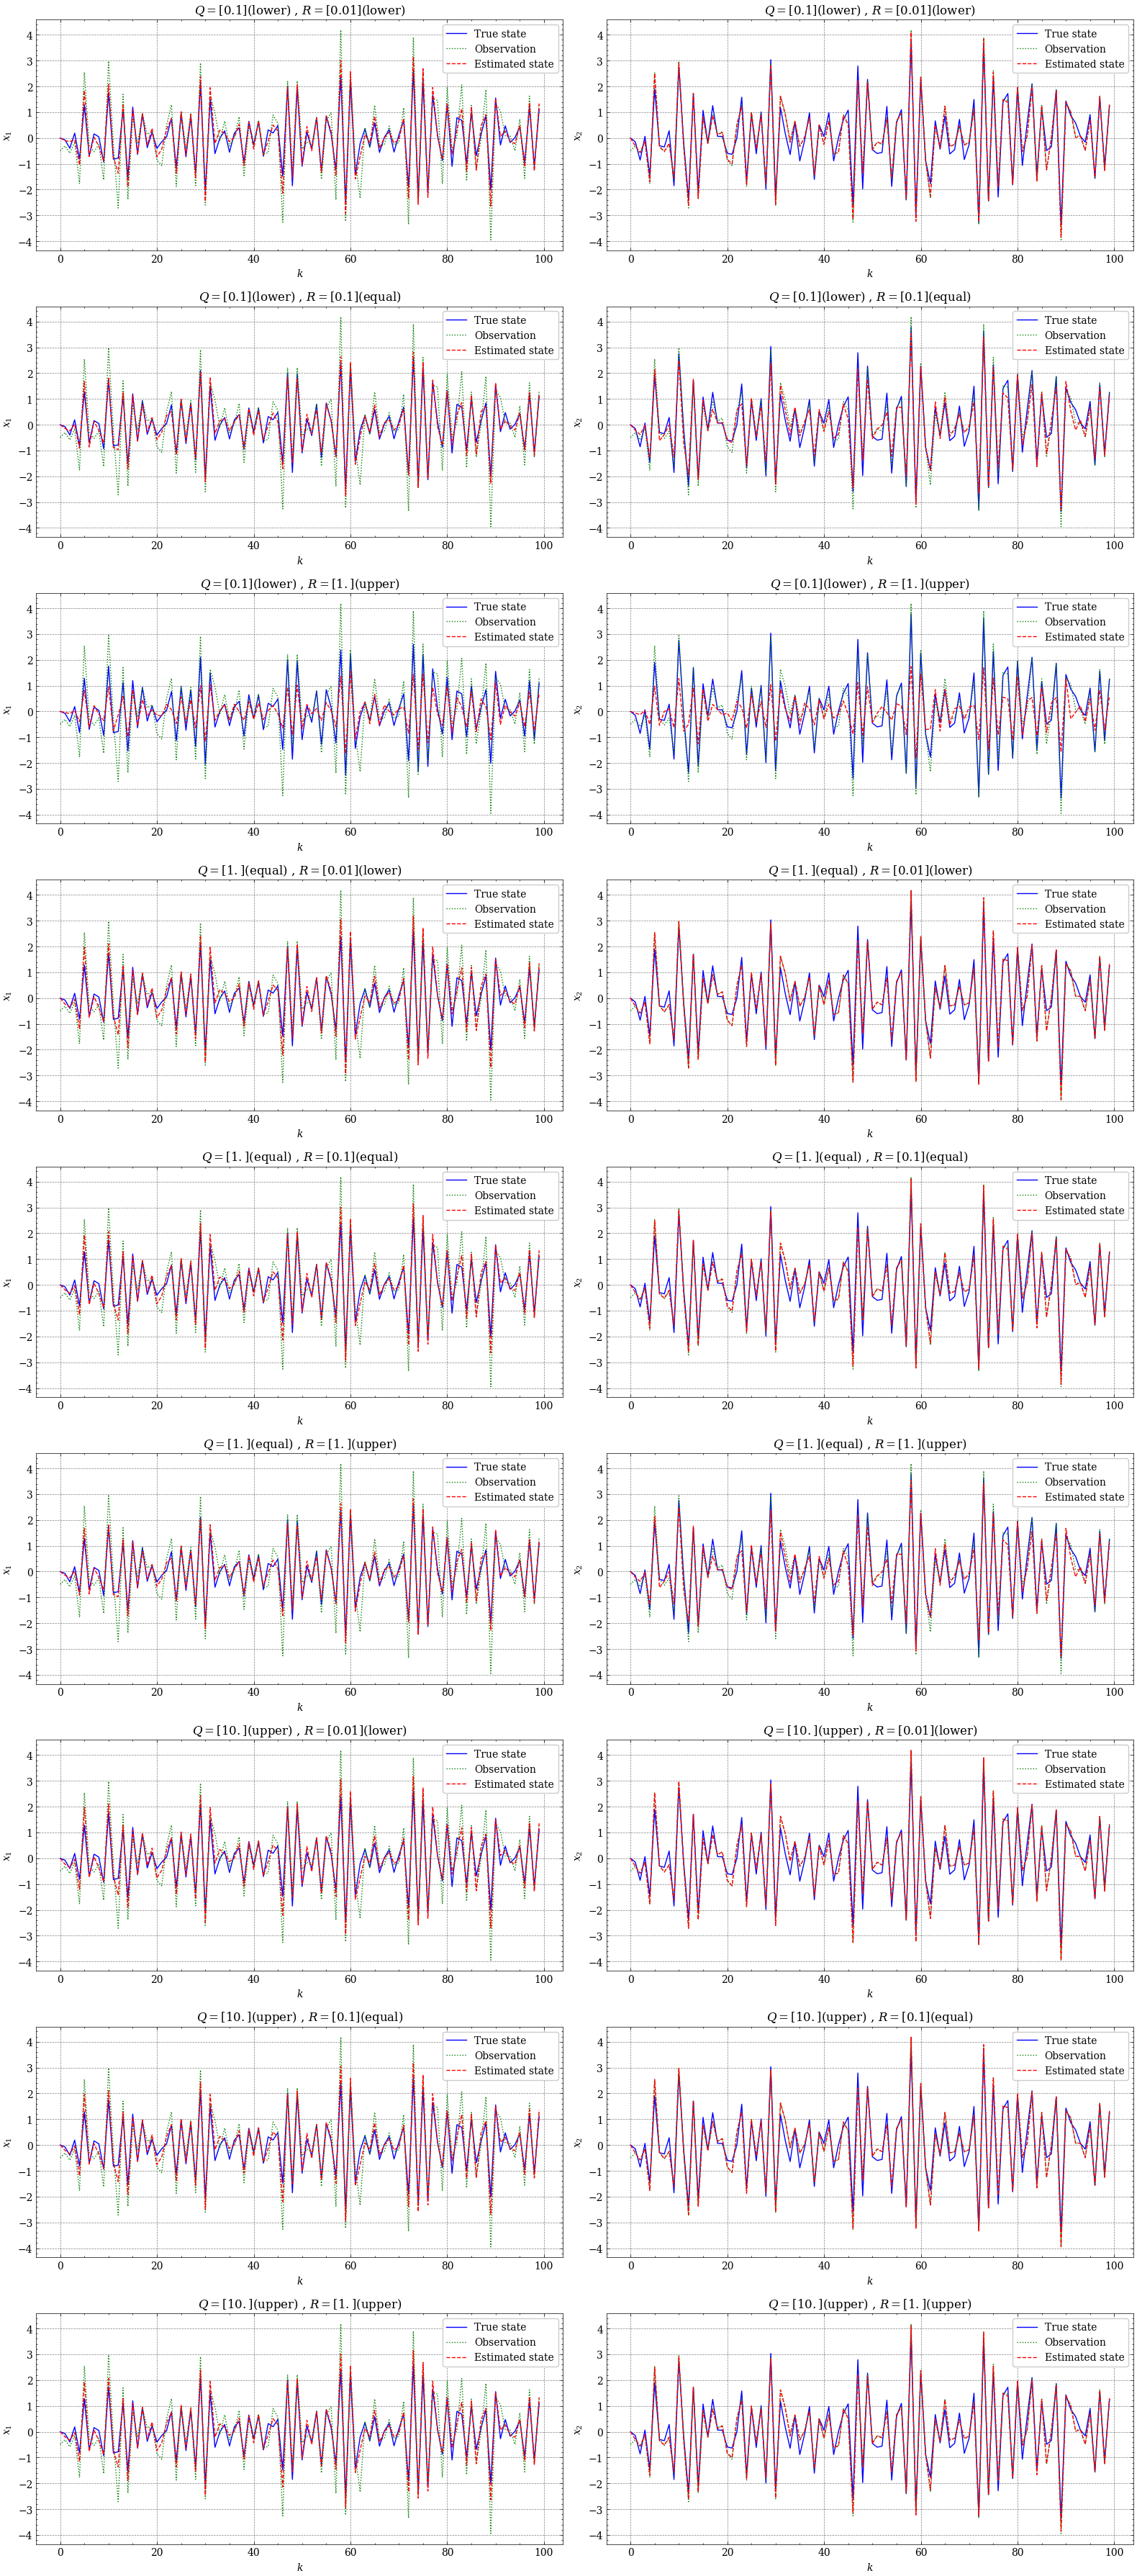

In [14]:
A = np.array([[0, -0.7], [1, -1.5]]) # システム行列 (2, 2)
B = np.array([0.5, 1]).reshape(-1, 1) # システム行列 (2, 1)
C = np.array([0, 1]).reshape(1, -1) # システム行列 (1, 2)
Q = np.array([1]).reshape(-1, 1) # システム雑音の共分散行列 (1, 1)
R = np.array([0.1]).reshape(-1, 1) # 観測雑音の共分散行列 (1, 1)

N = 100 # データ数

v = np.random.multivariate_normal([0], Q, N) # システム雑音 (N, 1)
w = np.random.multivariate_normal([0], R, N) # 観測雑音 (N, 1)

x = np.zeros((N, 2)) # 状態
y = np.zeros((N, 1)) # 観測値

x[0] = np.array([0, 0]) # 初期状態 (2, )
y[0] = C @ x[0].T + w[0] # 初期観測値 (1, )

for i in range(1, N):
    x[i] = A @ x[i-1].T + B @ v[i] # 状態遷移
    y[i] = C @ x[i].T + w[i] # 観測

x_hat = np.zeros((N, 2)) # 事後状態推定値 
gamma = 1 # 初期誤差共分散行列のゲイン
P = gamma * np.eye(2) # 初期誤差共分散行列 (2, 2)

params_Q = np.array([0.1, 1, 10]).reshape(-1, 1, 1)
params_R = np.array([0.01, 0.1, 1]).reshape(-1, 1, 1)
states = ["lower", "equal", "upper"]

plt.style.use(['science', 'grid', 'no-latex'])
fig, axes = plt.subplots(9, 2, figsize=(16, 4*9))

for i in range(3):
    for j in range(3):
        for k in range(1, N):
            x_hat[k], P, _ = kalman_filter(A, B, C, params_Q[i], params_R[j], y[k], x_hat[k-1].T, P)

        # 可視化
        for l in range(2):
            axes[3*i+j, l].plot(x[:, l], label='True state', linestyle='solid', color='blue')
            axes[3*i+j, l].plot(y[:, 0], label='Observation', linestyle='dotted', color='green')
            axes[3*i+j, l].plot(x_hat[:, l], label='Estimated state', linestyle='dashed', color='red')
            axes[3*i+j, l].set_xlabel('$k$')
            axes[3*i+j, l].set_ylabel(f'$x_{l+1}$')
            axes[3*i+j, l].legend(loc='upper right')
            axes[3*i+j, l].set_title(f'$Q = {params_Q[i][0]}$({states[i]}) , $R = {params_R[j][0]}$({states[j]})')
        
plt.tight_layout()
plt.savefig('kalman_filter.png', dpi=300)
plt.show()
